----
----
# Minor Exploratory Data Analysis
----
----

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# %matplotlib inline # (VSCode doesn't need this)
plt.style.use(['dark_background'])
plt.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv('df-ohe.csv', index_col=0).sample(frac=1)
df

,ranks,1_month,3_months,6_months,12_months,rating,image_size,desk_kde,desk_xfce,desk_budgie,...,init_sysv,init_oprc,init_other,jour_ext4,jour_ext3,jour_xfs,jour_btrfs,jour_reiser,journ_oth,multiling
rosa,98,144,132,128,142,9.1,1900,1,1,0,...,0,0,0,1,1,1,0,1,0,1
remnux,176,29,28,48,25,8.2,5100,0,0,0,...,0,0,0,0,0,0,0,0,1,1
baltix,275,34,13,7,4,6.9,3550,0,0,0,...,0,0,0,0,1,1,0,1,0,0
calculate,107,69,69,108,108,8.6,2550,1,1,0,...,1,1,0,1,1,1,1,0,0,1
popos,4,2242,2204,1821,1400,8.5,2450,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dragora,208,37,37,36,38,7.0,550,0,1,0,...,0,0,1,1,1,1,0,0,0,1
photonos,227,0,0,0,0,6.5,3150,0,0,0,...,0,0,0,1,0,0,0,0,0,0
blueonyx,239,32,31,30,31,8.7,1450,0,0,0,...,0,0,0,1,1,0,0,0,0,0
wifislax,184,46,45,44,45,8.2,2050,1,0,0,...,1,0,0,0,0,0,0,0,1,1


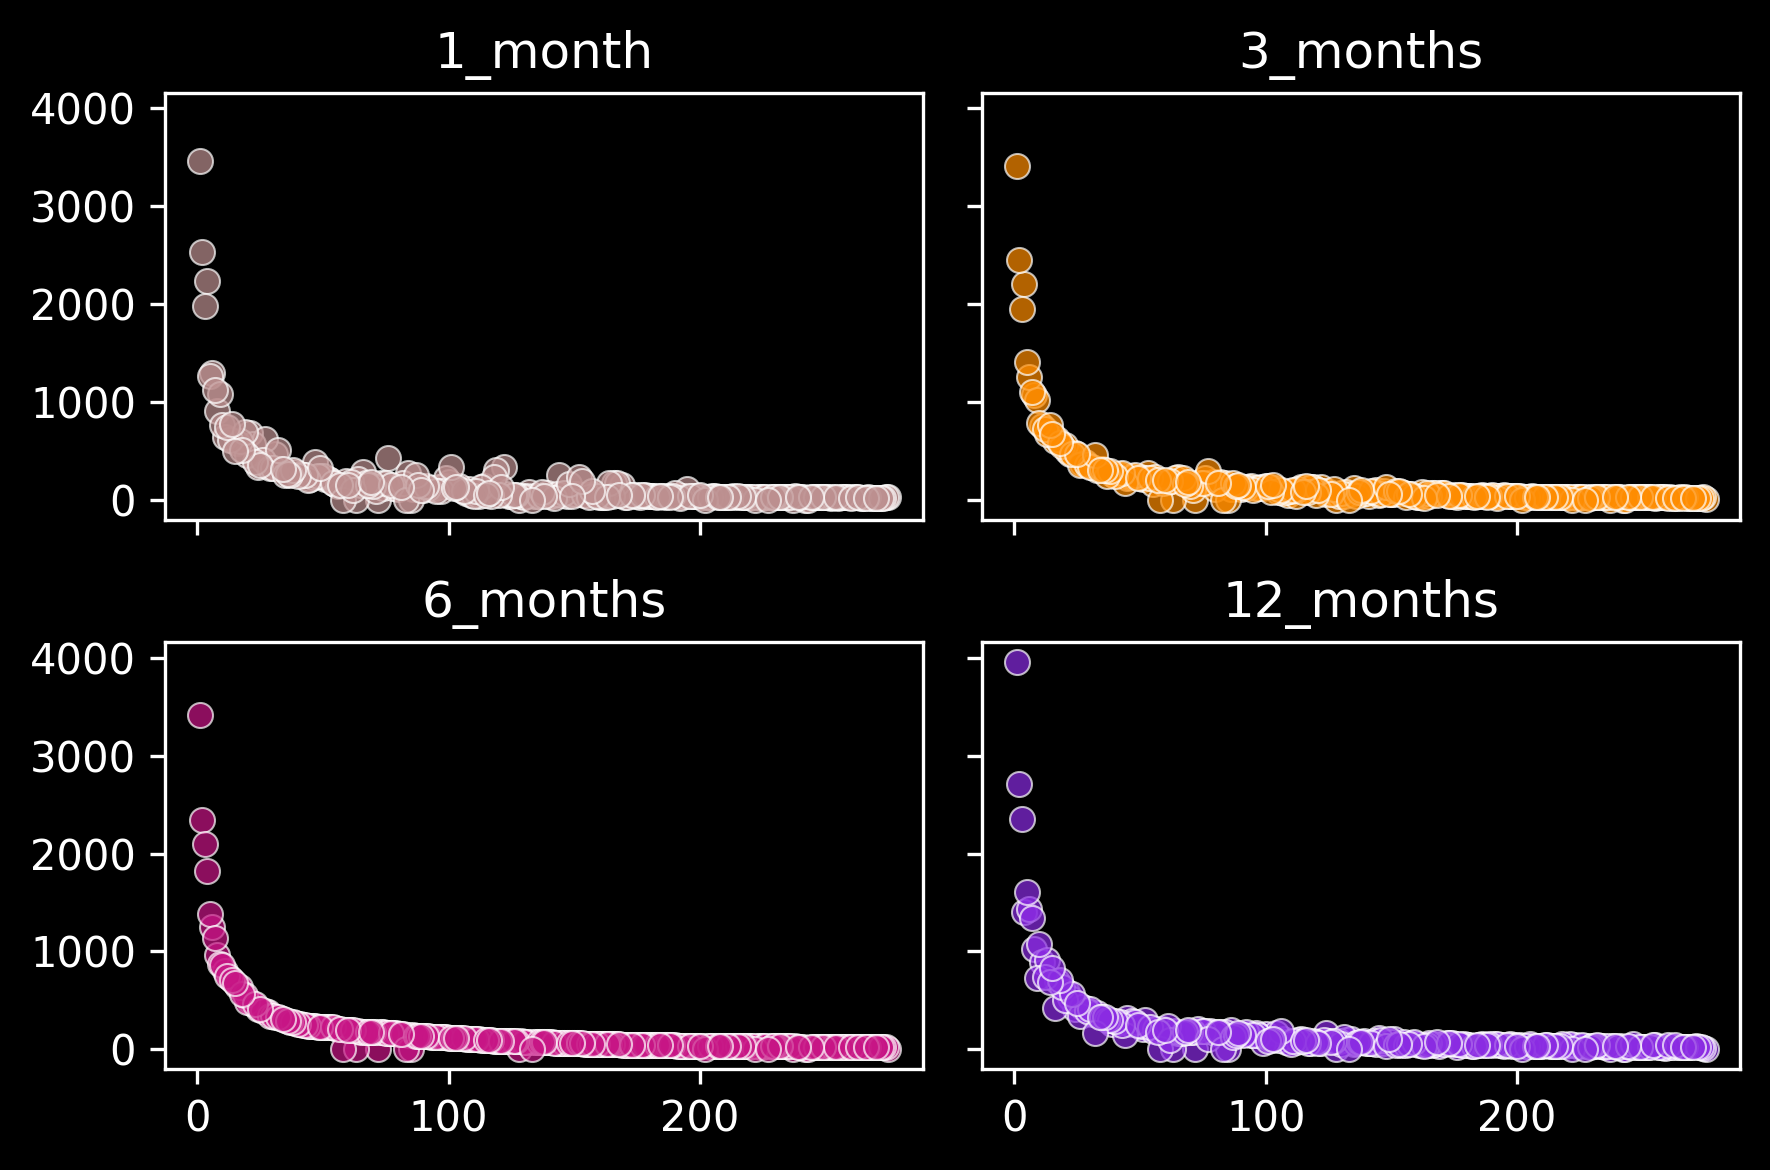

In [3]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
plt.yticks(np.arange(0, 4001, 1000))

axes = axes.ravel()
cols = ['1_month', '3_months', '6_months', '12_months']
colors = iter(['rosybrown', 'darkorange', 'mediumvioletred', 'blueviolet'])

for i, col in enumerate(cols):
    axes[i].scatter(x=df['ranks'], y=df[col], c=next(colors), ec='white', lw=0.5, alpha=0.7)
    axes[i].set(title=col)

plt.tight_layout()

### Distribution of Ratings

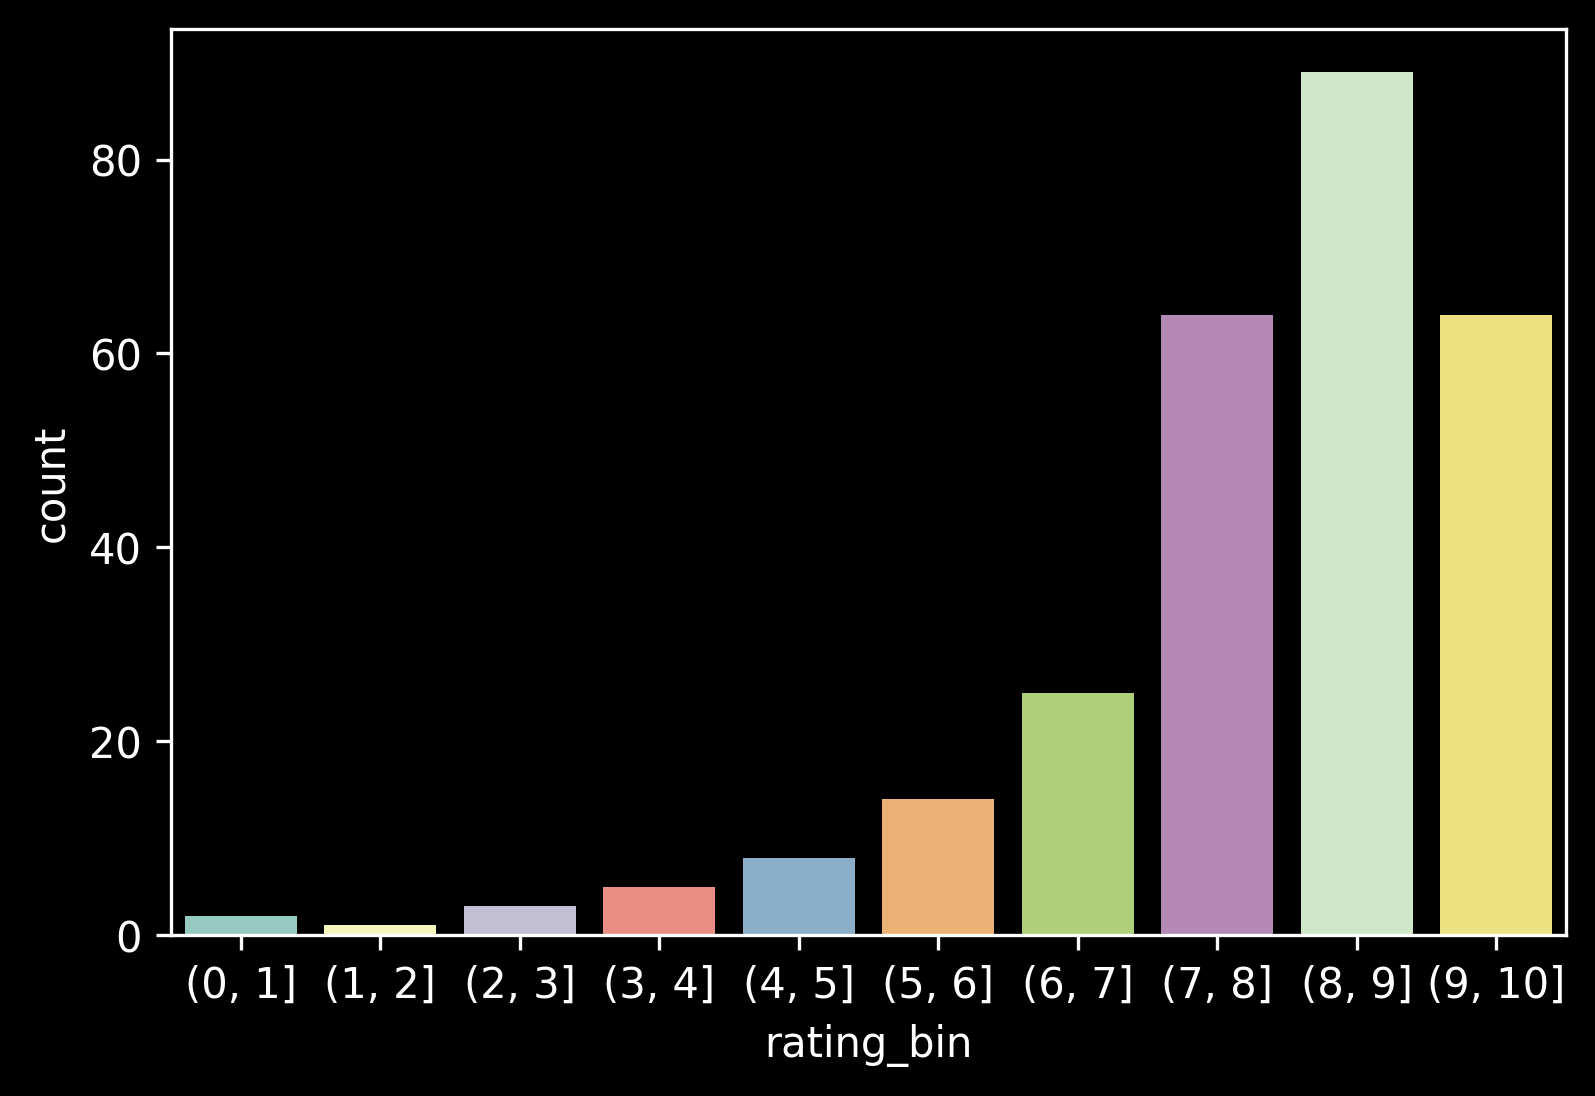

In [4]:
df['rating_bin'] = pd.cut(df['rating'], bins=np.arange(0, 11), right=True)

sns.countplot(df['rating_bin']);

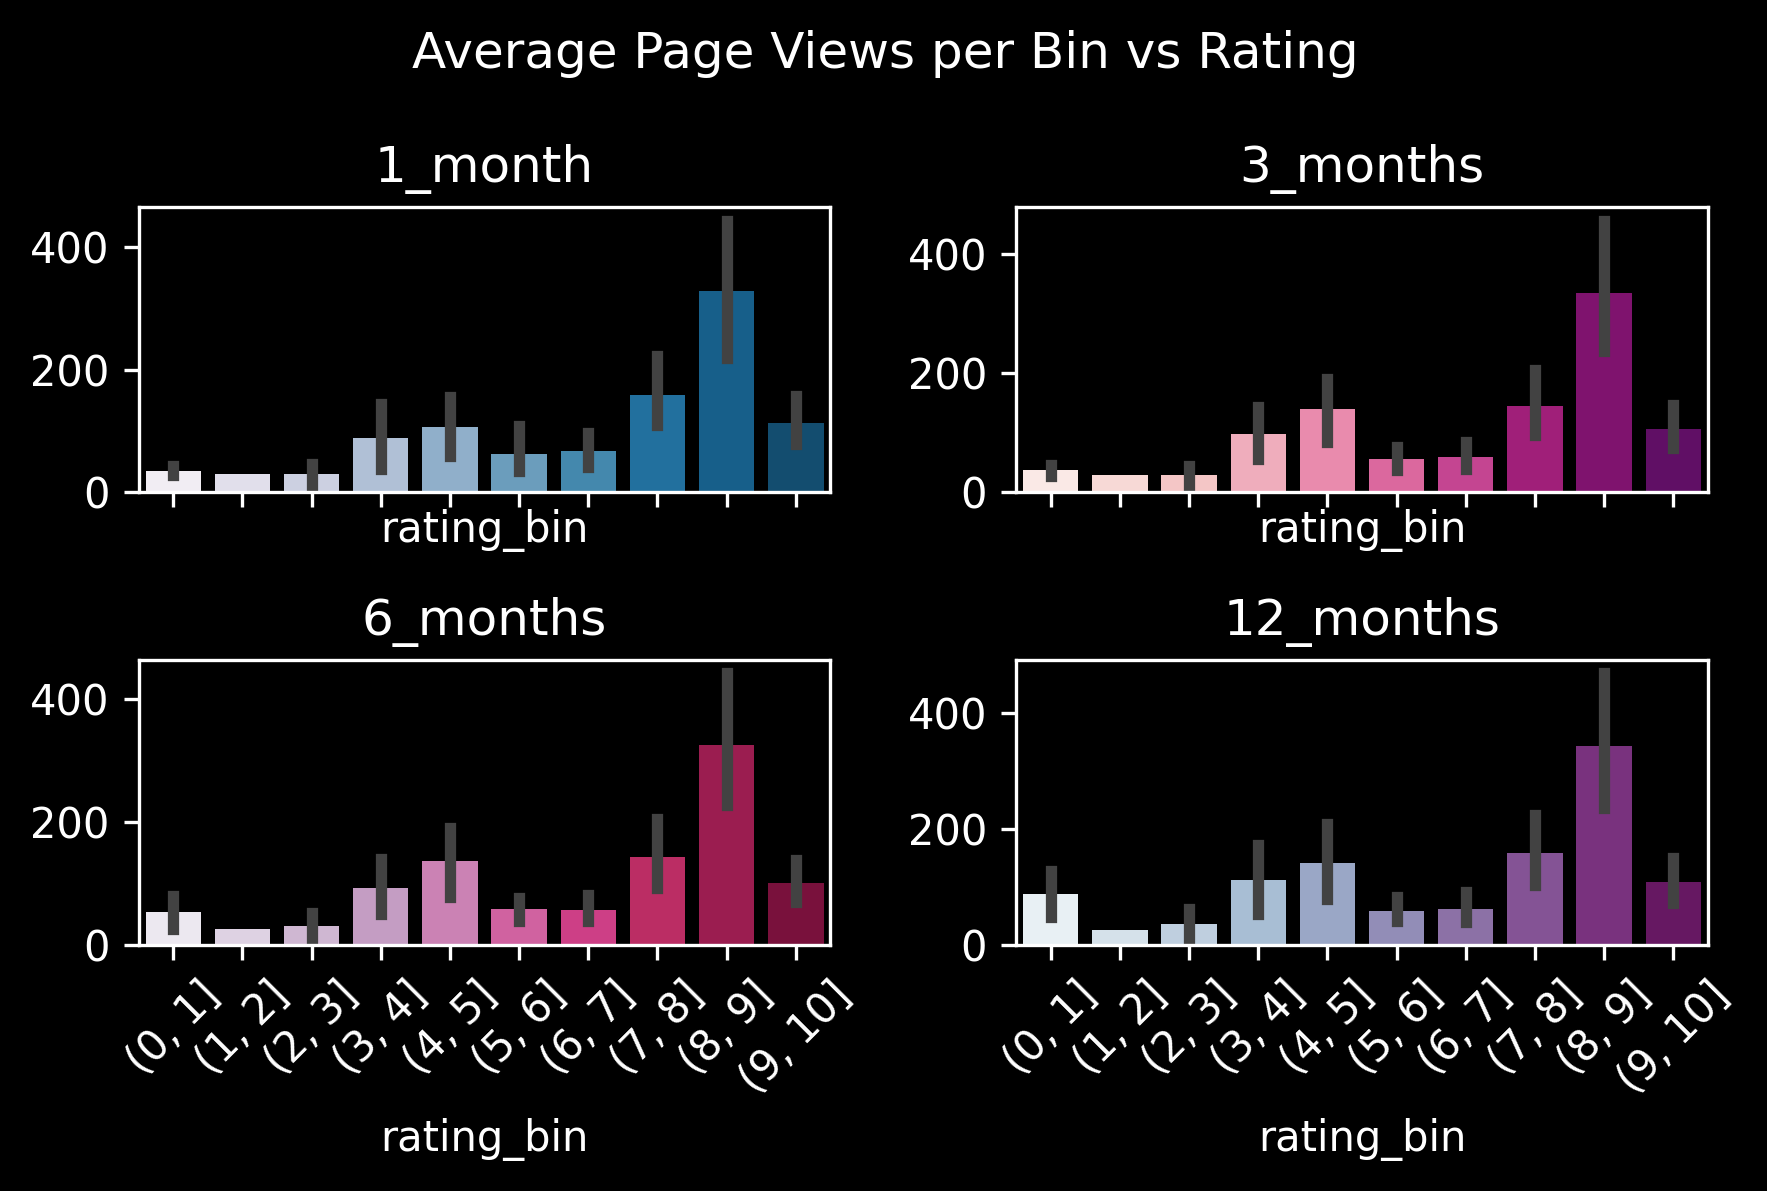

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True)

axes = axes.ravel()
cols = ['1_month', '3_months', '6_months', '12_months']
colors = iter(['PuBu', 'RdPu', 'PuRd', 'BuPu'])

for i, col in enumerate(cols):
    sns.barplot(ax=axes[i], x=df['rating_bin'], y=df[col], 
                                    palette=next(colors)).set(ylabel=None, title=col)
    axes[i].tick_params('x', labelrotation=45)

fig.suptitle('Average Page Views per Bin vs Rating')
plt.tight_layout()

In [6]:
df.loc[df['rating_bin'].apply(lambda x: x.overlaps(pd.Interval(8, 9))), '1_month']

remnux            29
calculate         69
popos           2242
freebsd          344
vine              38
                ... 
deepin           507
slackware        320
ubuntustudio     136
blueonyx          32
wifislax          46
Name: 1_month, Length: 89, dtype: int64

In [7]:
from collections import defaultdict

inter = np.arange(0, 11)
cols = ['1_month', '3_months', '6_months', '12_months']
max = {}
min = {}

for col in cols:
    for i in np.arange(0, 10):
        max[f'{col}: ({i}, {i+1})'] = df.loc[df['rating_bin'].apply(lambda x: x.overlaps(pd.Interval(i, i+1))), col].max()
        min[f'{col}: ({i}, {i+1})'] = df.loc[df['rating_bin'].apply(lambda x: x.overlaps(pd.Interval(i, i+1))), col].min()

max_d = defaultdict(dict)
for mb, v in max.items():
    m, b = mb.split(':')
    max_d[m][b.strip()] = v
    
min_d = defaultdict(dict)
for mb, v in min.items():
    m, b = mb.split(':')
    min_d[m][b.strip()] = v

max_d['1_month']['(0, 1)']

43

In [8]:
max_d

defaultdict(dict,
            {'1_month': {'(0, 1)': 43,
              '(1, 2)': 29,
              '(2, 3)': 46,
              '(3, 4)': 175,
              '(4, 5)': 217,
              '(5, 6)': 342,
              '(6, 7)': 329,
              '(7, 8)': 1271,
              '(8, 9)': 3464,
              '(9, 10)': 774},
             '3_months': {'(0, 1)': 46,
              '(1, 2)': 28,
              '(2, 3)': 44,
              '(3, 4)': 176,
              '(4, 5)': 231,
              '(5, 6)': 150,
              '(6, 7)': 229,
              '(7, 8)': 1410,
              '(8, 9)': 3407,
              '(9, 10)': 770},
             '6_months': {'(0, 1)': 79,
              '(1, 2)': 26,
              '(2, 3)': 52,
              '(3, 4)': 175,
              '(4, 5)': 239,
              '(5, 6)': 120,
              '(6, 7)': 232,
              '(7, 8)': 1378,
              '(8, 9)': 3413,
              '(9, 10)': 711},
             '12_months': {'(0, 1)': 128,
              '(1, 2)': 26,
    

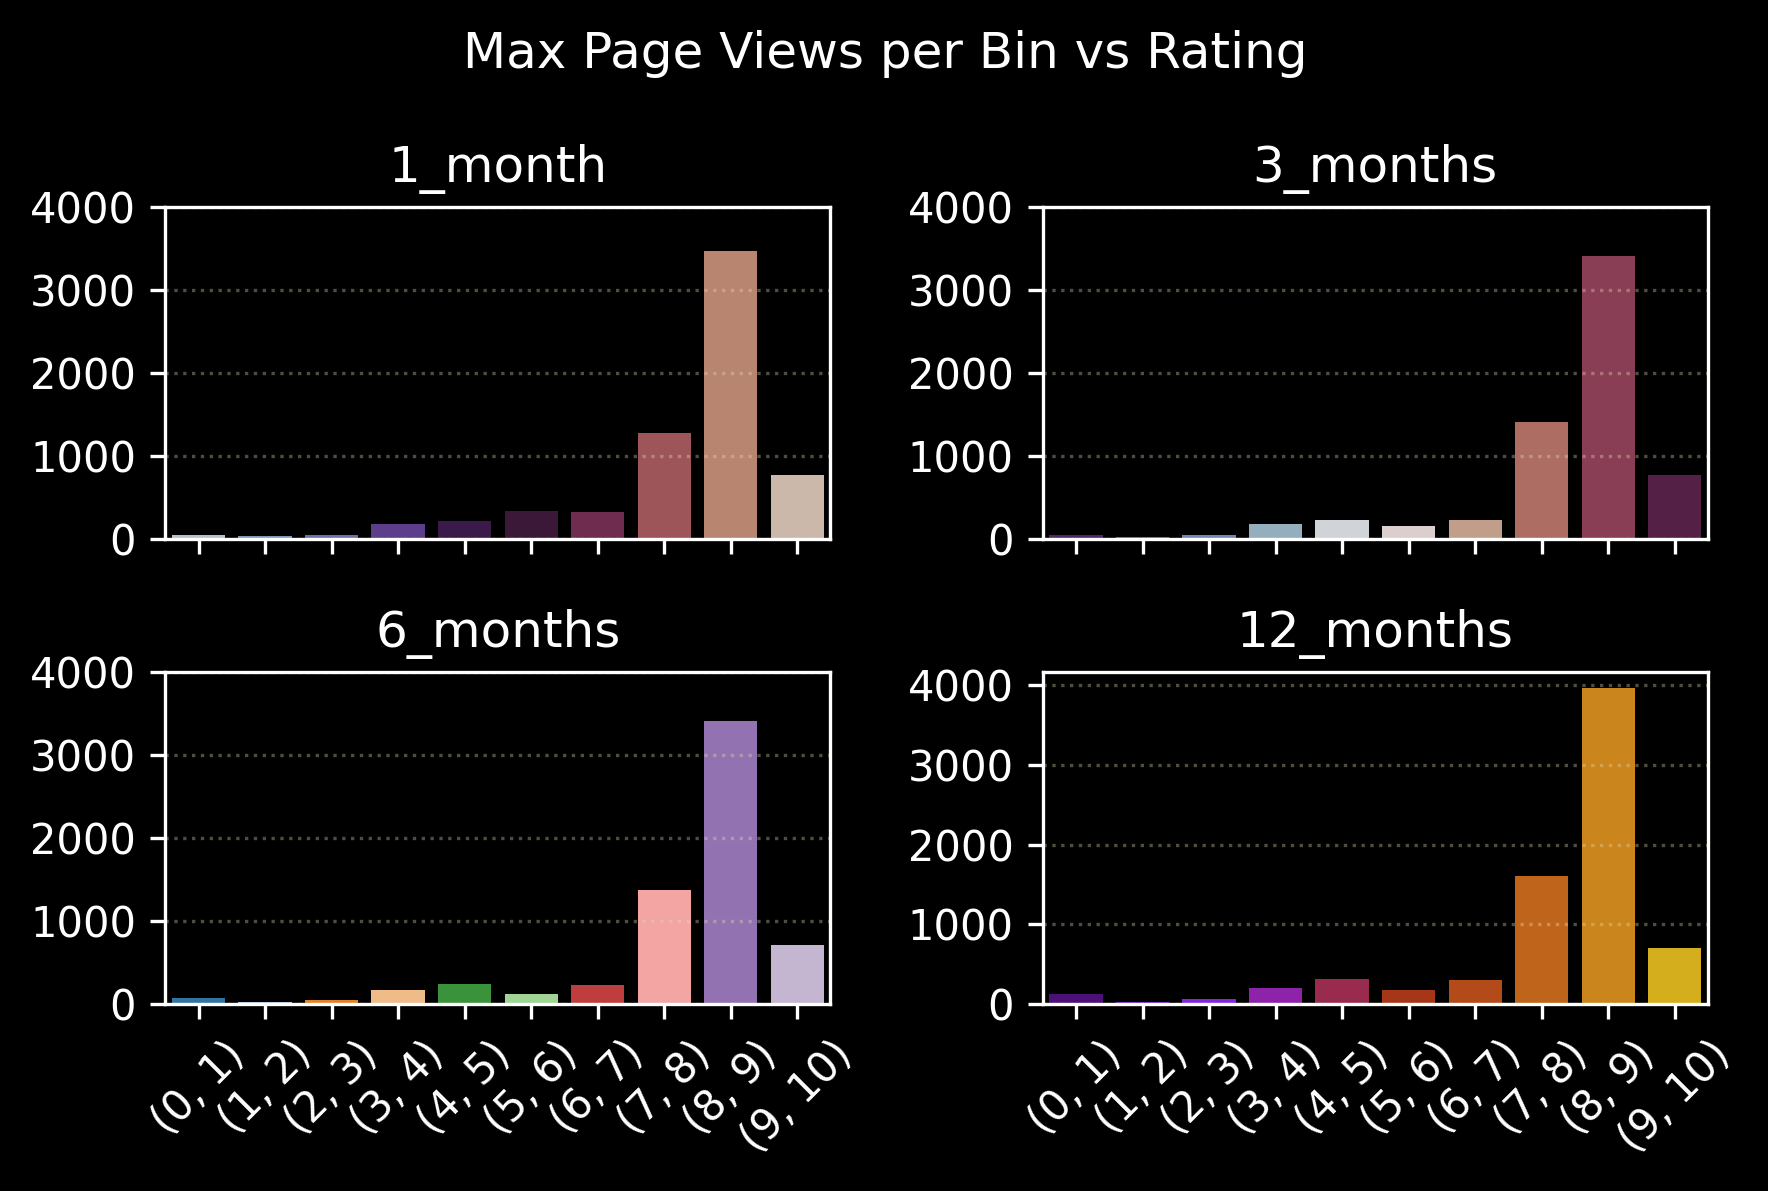

In [9]:
# sns.barplot(x=list(max_d['1_month'].keys()), y=list(max_d['1_month'].values()))

fig, axes = plt.subplots(2, 2, sharex=True)

axes = axes.ravel()
cols = ['1_month', '3_months', '6_months', '12_months']
colors = iter(['twilight', 'twilight_shifted', 'tab20', 'gnuplot'])

for i, col in enumerate(max_d.keys()):
    sns.barplot(ax=axes[i], x=list(max_d[col].keys()), y=list(max_d[col].values()), palette=next(colors)).set(title=col)
    axes[i].tick_params('x', labelrotation=45)
    axes[i].set_yticks(np.arange(0, 4001, 1000))
    axes[i].grid(b=True, which='both', axis='y', c='#ebdbb2', alpha=0.35, ls=':')

fig.suptitle('Max Page Views per Bin vs Rating')
plt.tight_layout()

## Machine Learning

In [10]:
df

,ranks,1_month,3_months,6_months,12_months,rating,image_size,desk_kde,desk_xfce,desk_budgie,...,init_oprc,init_other,jour_ext4,jour_ext3,jour_xfs,jour_btrfs,jour_reiser,journ_oth,multiling,rating_bin
rosa,98,144,132,128,142,9.1,1900,1,1,0,...,0,0,1,1,1,0,1,0,1,"(9, 10]"
remnux,176,29,28,48,25,8.2,5100,0,0,0,...,0,0,0,0,0,0,0,1,1,"(8, 9]"
baltix,275,34,13,7,4,6.9,3550,0,0,0,...,0,0,0,1,1,0,1,0,0,"(6, 7]"
calculate,107,69,69,108,108,8.6,2550,1,1,0,...,1,0,1,1,1,1,0,0,1,"(8, 9]"
popos,4,2242,2204,1821,1400,8.5,2450,0,0,0,...,0,0,1,0,0,1,0,0,1,"(8, 9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dragora,208,37,37,36,38,7.0,550,0,1,0,...,0,1,1,1,1,0,0,0,1,"(6, 7]"
photonos,227,0,0,0,0,6.5,3150,0,0,0,...,0,0,1,0,0,0,0,0,0,"(6, 7]"
blueonyx,239,32,31,30,31,8.7,1450,0,0,0,...,0,0,1,1,0,0,0,0,0,"(8, 9]"
wifislax,184,46,45,44,45,8.2,2050,1,0,0,...,0,0,0,0,0,0,0,1,1,"(8, 9]"


In [11]:
# df['fav'] = np.where((df['rating'] > 7) & (df['ranks'] < 85), 1, 0)

df['fav'] = np.where(df['rating'] > 8.5, 1, 0)

df = df.drop(['rating_bin', 'rating'], axis=1)

indices = list(range(len(df.index)))
np.random.shuffle(indices)

x_train_indices, x_test_indices = np.split(indices, [int(0.8*len(indices))])

df.head()
X_train = df.iloc[x_train_indices, 1:-1]
X_test = df.iloc[x_test_indices, 1:-1]
y_train = df.iloc[x_train_indices, -1]
y_test = df.iloc[x_test_indices, -1]

In [12]:
print('X_train: %s, X_test: %s \n y_train: %s, y_test: %s' % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (220, 66), X_test: (55, 66) 
 y_train: (220,), y_test: (55,)


In [13]:
from timeit import default_timer as t

class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000, bias=True):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = bias

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def fit(self, X, y):
        if isinstance(self.b, bool):
            X = np.hstack([np.ones([X.shape[0], 1]), X])

        n_samp, n_feat = X.shape
        self.w = np.random.rand(n_feat)
        
        start = t()
        for _ in range(self.n_iters):
            z = np.dot(X, self.w)
            y_pred = self._sigmoid(z)
            dw = (1 / n_samp) * (X.T @ (y_pred - y))
            self.w -= self.lr * dw
            
        end = t()
        print(f'Elapsed time: {end - start:.4f}')
            
    def predict_proba(self, X, threshold=0.5):
        if isinstance(self.b, bool):
            X = np.hstack([np.ones([X.shape[0], 1]), X])

        probs = self._sigmoid(X @ self.w)
        clss = probs >= threshold
        return probs, clss

In [14]:
np.random.seed(42)

lr = LogisticRegression(n_iters=10000, bias=True)
lr.fit(X_train, y_train)
probs, pred = lr.predict_proba(X_test)

Elapsed time: 1.9227


In [15]:
def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return round(acc, 3)

print(f'Accuracy: {accuracy(y_test, pred)}\nClass 1 count: {y_test.sum()} Class 0 count: {y_test.size - y_test.sum()}')

Accuracy: 0.618
Class 1 count: 22 Class 0 count: 33


----
### Dataframe of Probabilities
----

In [16]:
thresh_df = pd.DataFrame(probs, columns=['probs'])
thresh_df['true'] = pred.astype(int)

for i in np.arange(.10, 1, .05):
    thresh_df[f'thresh_{i:.2f}'] = np.where(thresh_df['probs']>=i, 1, 0)

thresh_df.head()

,probs,true,thresh_0.10,thresh_0.15,thresh_0.20,thresh_0.25,thresh_0.30,thresh_0.35,thresh_0.40,thresh_0.45,thresh_0.50,thresh_0.55,thresh_0.60,thresh_0.65,thresh_0.70,thresh_0.75,thresh_0.80,thresh_0.85,thresh_0.90,thresh_0.95
0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.358291e-43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.498425e-103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
for col in thresh_df.iloc[:, 2:]:
    print(f'{col}: {thresh_df[thresh_df[col] == 1].shape[0]}')

thresh_0.10: 1
thresh_0.15: 1
thresh_0.20: 1
thresh_0.25: 1
thresh_0.30: 1
thresh_0.35: 1
thresh_0.40: 1
thresh_0.45: 1
thresh_0.50: 1
thresh_0.55: 1
thresh_0.60: 1
thresh_0.65: 1
thresh_0.70: 1
thresh_0.75: 1
thresh_0.80: 1
thresh_0.85: 1
thresh_0.90: 1
thresh_0.95: 1


#### The probabilites are not very good and regardless of whatever the threshold is it will predict the same thing.  

This was a fun little project I did with maybe not the greatest data in the world.